In [5]:
# import necessary libraries for data explorations
# numpy
import numpy as np

# pandas
import pandas as pd
from pandas import set_option

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# ipython
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.as_node_interactivity = "all"

In [8]:
# load datasets
train = 'data/train.csv'
test = 'data/test.csv'
train_data = pd.read_csv(train)
test_data = pd.read_csv(test)

In [12]:
train_data.shape

(891, 12)

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_data.describe()
# about 38% of the passengers survived
# the age feature has missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# filling the missing observations in the age feature with the median of the age feature
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [17]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


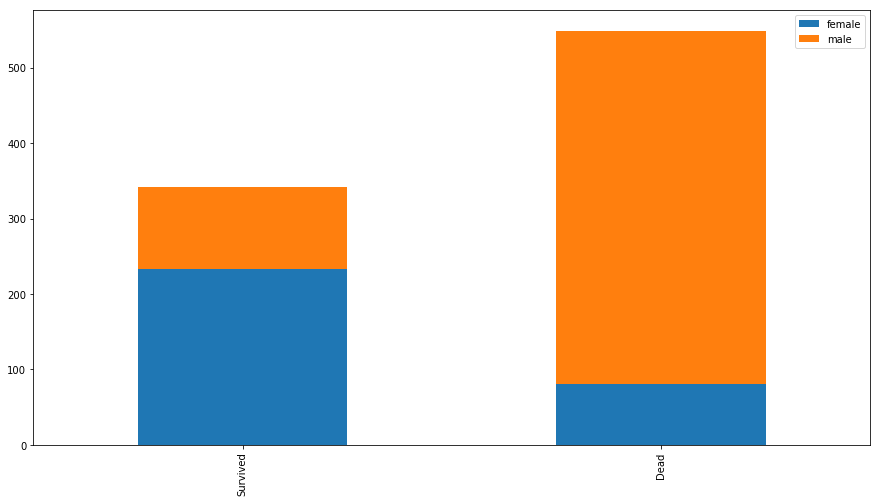

In [120]:
# survival in terms of sex
survived_sex = train_data[train_data['Survived']==1]['Sex'].value_counts()
dead_sex = train_data[train_data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead']
# df.plot(kind='bar', stacked=True, figsize=(15,8))
# as we can see a lot of died mostlt men which makes sense since women and children were the first to be rescued
ax = df.plot(kind='bar', stacked=True, figsize=(15,8))
fig = ax.get_figure()
fig.savefig('images/sex_survival', transparent=False, dpi=80, bbox_inches='tight')

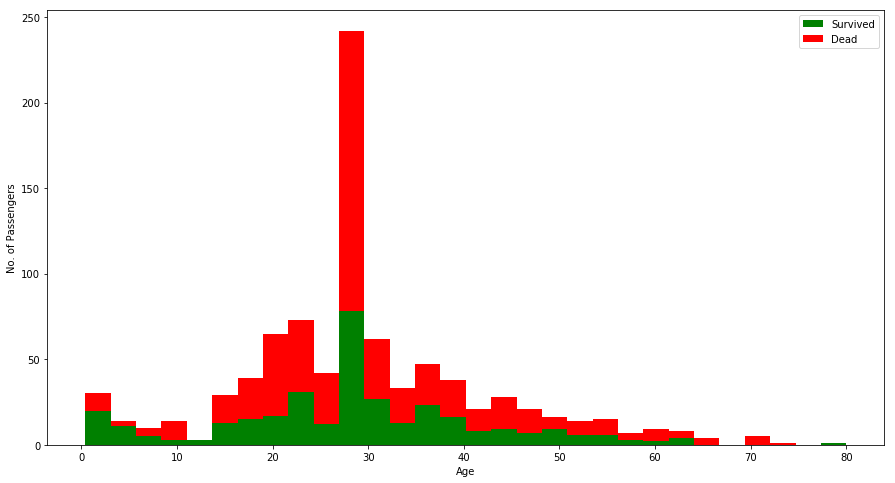

In [105]:
# survival in terms of age
survived_age = train_data[train_data['Survived']==1]['Age']
dead_age = train_data[train_data['Survived']==0]['Age']
plt.figure(figsize=(15,8))
plt.hist([survived_age, dead_age], stacked=True, color=['g','r'], bins=30, label=['Survived', 'Dead'])
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.legend()
plt.savefig('images/age_survival', transparent=False, dpi=80, bbox_inches='tight')
# a lot of people in the range of 28 to 30 died
# an old person close to 80 was likely to survive

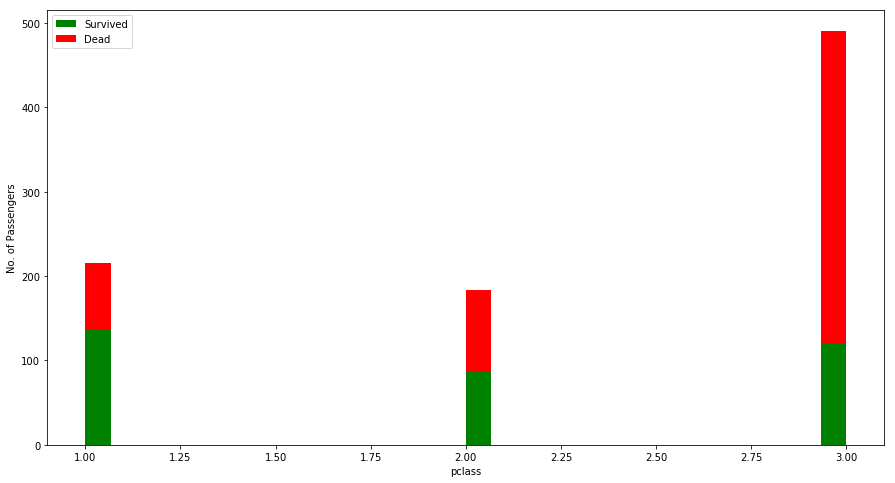

In [106]:
# survival in terms of pclass
survived_class = train_data[train_data['Survived']==1]['Pclass']
dead_class = train_data[train_data['Survived']==0]['Pclass']
plt.figure(figsize=(15,8))
plt.hist([survived_class, dead_class], stacked=True, color=['g','r'], bins=30, label=['Survived', 'Dead'])
plt.xlabel('pclass')
plt.ylabel('No. of Passengers')
plt.legend()
plt.savefig('images/pclass_survival', transparent=False, dpi=80, bbox_inches='tight')
# clearly 1st class passengers are likely to survied
# unfortunately 3rd class passengers are likely to die

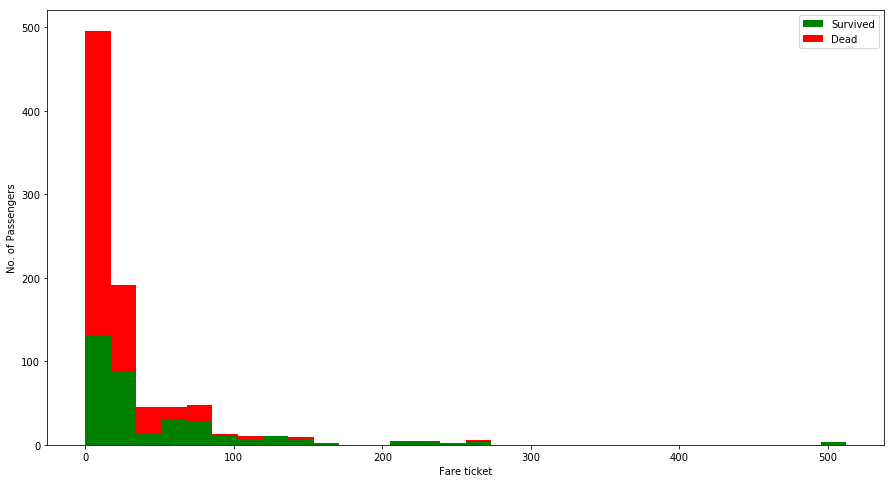

In [107]:
# survival in terms of fare
survived_fare = train_data[train_data['Survived']==1]['Fare']
dead_fare = train_data[train_data['Survived']==0]['Fare']
plt.figure(figsize=(15,8))
plt.hist([survived_fare, dead_fare], stacked=True, color=('g', 'r'), bins=30, label=['Survived', 'Dead'])
plt.xlabel('Fare ticket')
plt.ylabel('No. of Passengers')
plt.legend()
plt.savefig('images/fare_survival', transparent=False, dpi=80, bbox_inches='tight')
# so those who paid lower far tickets are likely to die

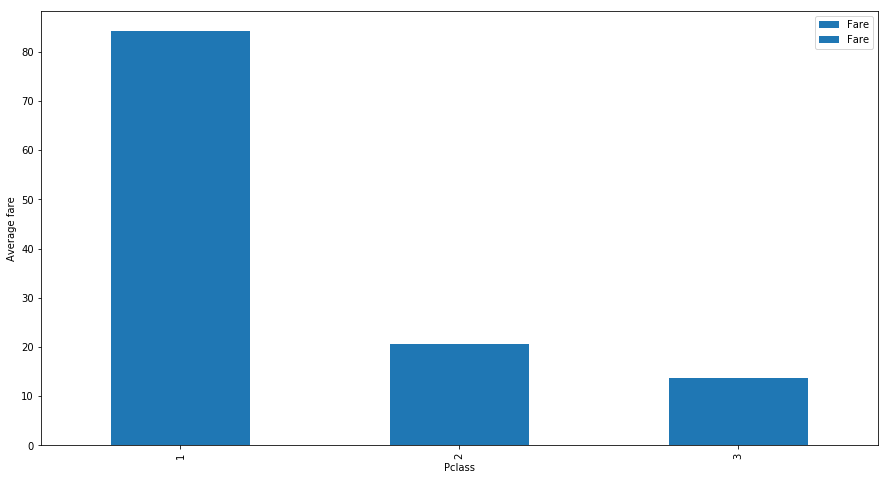

In [109]:
# lets see if fare ticket correlates with class
ax = plt.subplot()
ax.set_ylabel('Average fare')
train_data.groupby('Pclass')[['Fare']].mean().plot(kind='bar', figsize=(15,8), ax=ax)
fig = train_data.groupby('Pclass')[['Fare']].mean().plot(kind='bar', figsize=(15,8), ax=ax).get_figure()
fig.savefig('images/fare_class_correlation', transparent=False, dpi=80, bbox_inches='tight')

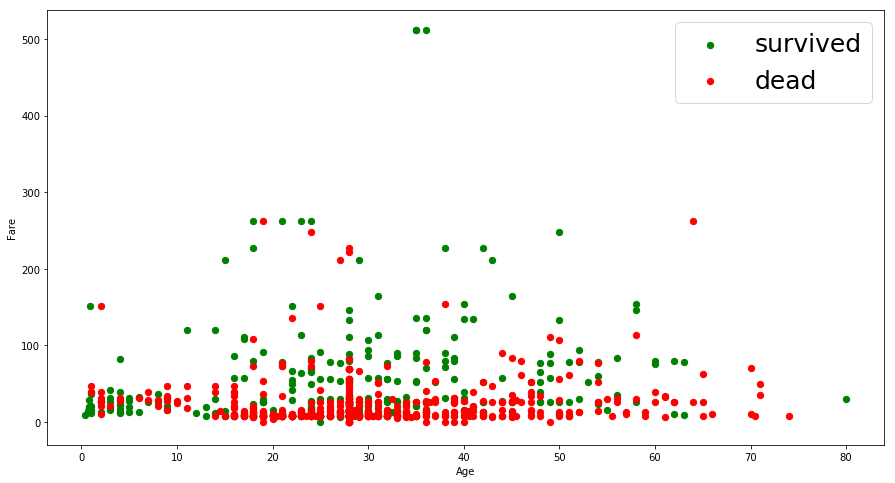

In [110]:
# now lets combine age fare and survival on a single chart
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(survived_age, survived_fare, c='green', s=40)
ax.scatter(dead_age, dead_fare, c='red', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'), scatterpoints=1, fontsize=25)
plt.savefig('images/age_fare_survival_scatter', transparent=False, dpi=80, bbox_inches='tight')

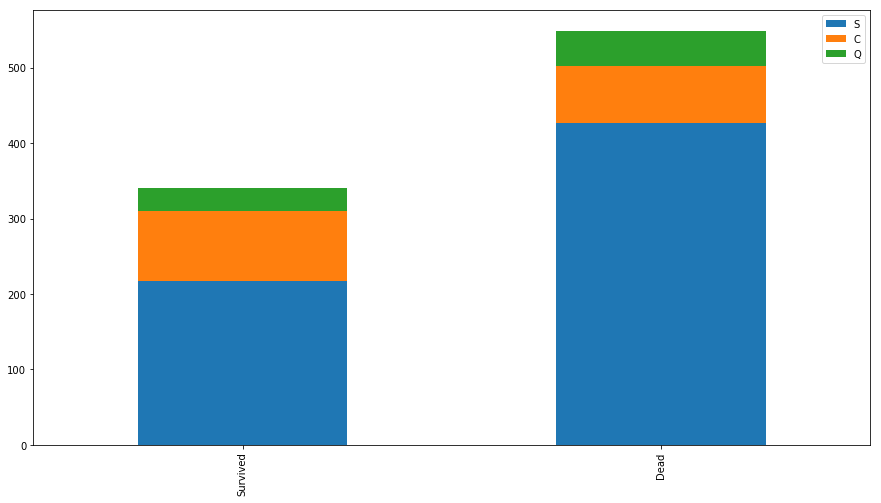

In [119]:
# surival by embarkation
survived_embark = train_data[train_data['Survived']==1]['Embarked'].value_counts()
dead_embark = train_data[train_data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark, dead_embark])
df.index = ['Survived', 'Dead']
fig = df.plot(kind='bar', stacked=True, figsize=(15,8)).get_figure()
fig.savefig('images/embarkation_survival', transparent=False, dpi=80, bbox_inches='tight')

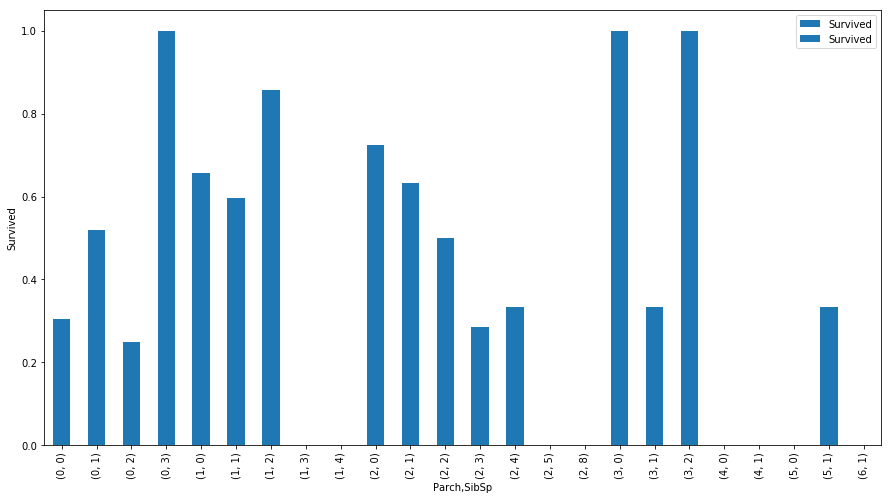

In [114]:
# parent child and sibling spouse in relation to survival
ax = plt.subplot()
ax.set_ylabel('Survived')
train_data.groupby(['Parch','SibSp'])[['Survived']].mean().plot(kind='bar', figsize=(15,8), ax=ax)
fig = train_data.groupby(['Parch','SibSp'])[['Survived']].mean().plot(kind='bar', figsize=(15,8), ax=ax).get_figure()
fig.savefig('images/parch_sibsp_survival', transparent=False, dpi=80, bbox_inches='tight')